In [44]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras import optimizers
from keras import initializers
from keras import losses

In [2]:
fname_train = './img100000nonrad.csv'
fname_test = './rindex100000nonrad.csv'
fname_val = './1.5_0.015.csv'
data_train = np.loadtxt(fname_train, delimiter=',')
data_test = np.loadtxt(fname_test, delimiter=',')
data_val = np.reshape(np.loadtxt(fname_val, delimiter=','), (1, 200))

In [3]:
class ParamsMeanHistory(keras.callbacks.Callback):
    def __init__(self, model):
        self.model = model
        self.paramsMeanHistory = {}
        for i in range(len(self.model.layers)):
            layer = self.model.layers[i]
            tmp = {'L'+str(i+1)+'_'+'P'+str(j+1):[] for j in range(len(layer.weights))}
            self.paramsMeanHistory.update(tmp)
    def on_epoch_end(self,epoch,logs={}):
        for i in range(len(self.model.layers)):
            params = self.model.layers[i].weights
            for j in range(len(params)):
                param = params[j].numpy()
                self.paramsMeanHistory['L'+str(i+1)+'_'+'P'+str(j+1)].append(np.sum(param)/param.size)

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 [==============================] - 1s 17us/step - loss: 0.2655 - val_loss: 0.2097
Epoch 2/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.1665 - val_loss: 0.0447
Epoch 3/100
80000/80000 [==============================] - 1s 15us/step - loss: 0.1116 - val_loss: 0.0122
Epoch 4/100
80000/80000 [==============================] - 1s 15us/step - loss: 0.0783 - val_loss: 0.0017
Epoch 5/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.0570 - val_loss: 0.0061
Epoch 6/100
80000/80000 [==============================] - 1s 15us/step - loss: 0.0312 - val_loss: 0.0202
Epoch 7/100
80000/80000 [==============================] - 1s 15us/step - loss: 0.0283 - val_loss: 0.0035
Epoch 8/100
80000/80000 [==============================] - 1s 15us/step - loss: 0.0253 - val_loss: 0.0102
Epoch 9/100
80000/80000 [==============================] - 1s 15us/step - loss: 0.0221 - val_loss: 0.0

80000/80000 [==============================] - 1s 18us/step - loss: 0.0059 - val_loss: 0.0307
Epoch 78/100
80000/80000 [==============================] - 1s 17us/step - loss: 0.0061 - val_loss: 0.0219
Epoch 79/100
80000/80000 [==============================] - 2s 20us/step - loss: 0.0060 - val_loss: 0.0214
Epoch 80/100
80000/80000 [==============================] - 1s 19us/step - loss: 0.0057 - val_loss: 0.0230
Epoch 81/100
80000/80000 [==============================] - 1s 18us/step - loss: 0.0060 - val_loss: 0.0281
Epoch 82/100
80000/80000 [==============================] - 1s 18us/step - loss: 0.0063 - val_loss: 0.0390
Epoch 83/100
80000/80000 [==============================] - 1s 17us/step - loss: 0.0060 - val_loss: 0.0236
Epoch 84/100
80000/80000 [==============================] - 1s 18us/step - loss: 0.0065 - val_loss: 0.0222
Epoch 85/100
80000/80000 [==============================] - 1s 17us/step - loss: 0.0060 - val_loss: 0.0351
Epoch 86/100
80000/80000 [========================

No handles with labels found to put in legend.


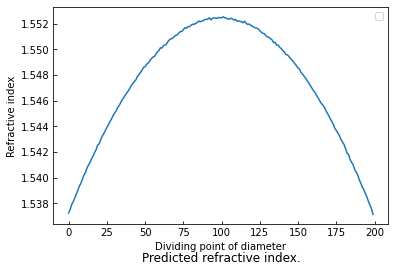

In [18]:
batch_size = 100
l1 = 'af'
h1 = 50
ad1_1 = '_randn0.0005-0.005'
ad1_2 = ''
ac1 = ''
l2 = ''
h2 = ''
ad2_1 = ''
ad2_2 = ''
ac2 = ''
op = 'sgd'
lr = 0.1
lo = 'mse'
path = './simResults/{}{}{}{}{}-{}{}{}{}{}-{}{}-{}'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo)
os.mkdir(path)

model = Sequential()
model.add(Dense(units=h1, input_shape=(200,), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0005, seed=None)))
model.add(Dense(units=200, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=None)))
model.compile(optimizer=optimizers.SGD(lr=lr), loss=losses.MeanSquaredError())
pmh = ParamsMeanHistory(model)
log = model.fit(x=data_train, y=data_test, batch_size=batch_size, epochs=100, validation_split=0.2, shuffle=True, callbacks=[pmh])
pred = model.predict_on_batch(x=data_val)

y = pred.flatten()
x = np.arange(len(y))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x, y)
plt.title("Predicted refractive index.", y=-0.2)
plt.legend()
plt.xlabel('Dividing point of diameter')
plt.ylabel('Refractive index')
plt.savefig(path+'/'+os.path.splitext(os.path.basename(fname_val))[0]+'_pred.png', bbox_inches='tight')
plt.show()

with open(path+'/Pred_{}{}{}{}{}-{}{}{}{}{}-{}{}-{}.pickle'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo), mode='wb') as f:
    pickle.dump(pred, f)
with open(path+'/Losses_{}{}{}{}{}-{}{}{}{}{}-{}{}-{}.pickle'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo), mode='wb') as f:
    pickle.dump(log, f)
with open(path+'/Params_{}{}{}{}{}-{}{}{}{}{}-{}{}-{}.pickle'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo), mode='wb') as f:
    pickle.dump(pmh, f)